[3 1 2 3 1 3 2 3 1 1 3 2 0 0 3 0 1 0 3 2 2 3 2 2 0 3 3 0 2 0 1 1 2 2 3 1 0
 0 0 1 1 0 1 2 3 2 3 3 0 0 1 1 2 1 1 0 1 3 1 3 1 0 1 3 1 0 3 3 2 2 0 2 1 0
 3 2 1 3 3 0 2 2 1 2 3 2 2 2 3 0 0 3 2 3 2 2 2 2 0 1 1 1 3 3 3 2 3 3 3 0 3
 3 1 0 2 0 2 1 1 0 2 0 2 1 0 3 3 1 0 0 0 0 1 1 0 3 2 3 1 0 0 0 0 3 0 1 1 0
 3 3 0 1 2 2 3 3 3 0 0 0 0 3 1 1 0 1 2 2 3 3 3 3 2 0 2 3 0 0 0 0 3 3 3 2 1
 0 0 1 2 1 3 3 2 1 2 0 0 3 3 0 1 1 2 1 1 2 3 2 0 3 2 2 3 1 0 0 2 0 2 3 3 3
 2 1 3 0 2 1 0 3 2 3 0 1 2 1 2 3 2 1 2 0 0 3 1 3 0 0 0 3 3 1 2 1 1 1 0 0 2
 0 1 0 1 1 2 3 2 1 2 1 2 2 3 3 3 1 2 2 2 1 1 3 0 3 3 2 2 0 2 3 1 2 1 2 1 2
 2 0 3 1 2 1 3 0 1 0 2 3 1 3 1 2 3 2 1 3 0 0 0 0 0 2 0 0 0 2 1 0 1 2 0 2 1
 2 3 3 1 2 2 2 2 3 3 0 3 3 1 2 3 2 1 1 1 0 2 3 2 3 2 0 3 3 2 1 3 3 3 0 1 1
 1 1 2 2 3 0 2 1 0 0 0 0 0 1 0 3 1 3 1 3 0 2 3 1 1 3 3 0 0 2 1 1 0 1 1 0 2
 2 3 1 1 3 1 2 3 0 0 3 1 1 3 3 0 0 1 3 0 1 1 3 2 0 1 2 2 2 3 1 0 3 2 0 1 3
 0 2 0 1 0 3 2 2 2 0 2 1 3 3 2 0 0 1 2 2 0 0 3 0 2 0 1 0 0 2 0 2 0 1 1 1 0
 0 0 0 0 2 3 2 1 2 3 1 1 

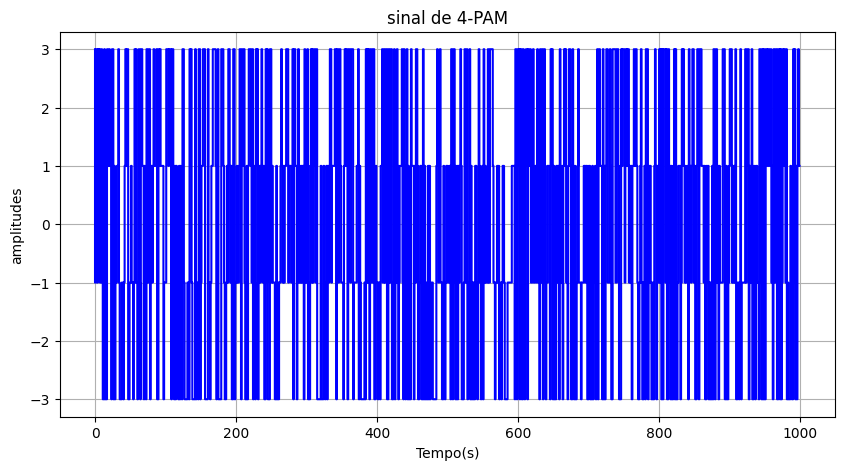

In [15]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000 # numero de simbolos ou numero de bits representados por cada simbolo
M = 4 # Numero de niveis de amplitudes ou numero de simbolos utilizados
A = 1 # amplitude maxima
Tb = 1 # duracao de bit em segundo

simbolos= np.random.randint (0,M,N)# gera uma sequecia de N simbolos aleatorios entre 0 e M-1
print(simbolos)
amplitudes = np.array([-3,-1,1,3]) # amplitudes para os 4 simbolos
print(amplitudes)
senal= amplitudes [simbolos]
print(senal)
t= np.linspace(0,N*Tb,N,endpoint=False) #tempo de amostragem
plt.figure(figsize = (10,5))
plt.plot(t,senal,'b-',drawstyle='steps-pre')
plt.xlabel('Tempo(s)')
plt.ylabel('amplitudes')
plt.title('sinal de 4-PAM')
plt.grid(True)
plt.show()

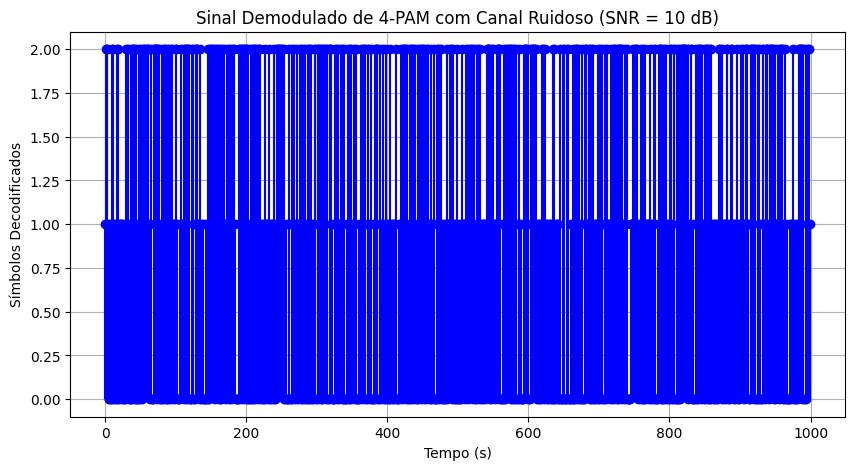

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do sinal
N = 1000  # número de símbolos ou numero de bits representados por cada simbolo
M = 4  # número de níveis de amplitude ou numero de simbolos utilizados
A = 1  # amplitude máxima
Tb = 1  # duração de bit em segundos

# Geração de símbolos aleatórios
simbolos = np.random.randint(0, M, N)#gera uma sequencia de de N simbolos aleatorios entre 0 e M-1

# Mapeamento dos símbolos para amplitudes
amplitudes = np.array([-3, -1, 1, 3])  # amplitudes para os 4 símbolos
senal = amplitudes[simbolos]

# Tempo do sinal
t = np.linspace(0, N * Tb, N, endpoint=False)#tempo de amostragem

# Adicionando ruído gaussiano ao sinal (para simular canal ruidoso)
SNR_dB = 10  # relação sinal-ruído em dB
SNR_linear = 10 ** (SNR_dB / 10)
var_ruido = A ** 2 / (2 * SNR_linear)
ruido = np.random.normal(0, np.sqrt(var_ruido), len(senal))
senal_ruidosa = senal + ruido

# Demodulação do sinal 4-PAM
limiares = [-2, 0, 2]  # Limiares de decisão
demodulado = np.zeros(N)
for i in range(N):
    # Encontra o índice do limiar mais próximo
    limiar_idx = np.argmin(np.abs(senal_ruidosa[i] - np.array(limiares)))
    demodulado[i] = limiar_idx

# Plot do sinal demodulado
plt.figure(figsize=(10, 5))
plt.stem(t, demodulado, linefmt='b-', markerfmt='bo', basefmt=' ')
plt.xlabel('Tempo (s)')
plt.ylabel('Símbolos Decodificados')
plt.title('Sinal Demodulado de 4-PAM com Canal Ruidoso (SNR = {} dB)'.format(SNR_dB))
plt.grid(True)
plt.show()





